### Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

### Load, explore data + split into training and testing variables

In [4]:
train_df = pd.read_csv('/Users/nicolasdemuynck/BeCode/GNT-ARAI-1.25/additional_resources/datasets/US Income/cleaned/data_train.csv')
test_df = pd.read_csv('/Users/nicolasdemuynck/BeCode/GNT-ARAI-1.25/additional_resources/datasets/US Income/cleaned/data_test.csv')

In [5]:
train_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [6]:
test_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0


In [7]:
print(train_df.shape)
print(test_df.shape)

(32561, 15)
(16281, 15)


In [8]:
X_train=train_df.drop('income',axis=1) # Declare X and y variable + split into train/test
X_test=test_df.drop('income', axis=1)
y_train=train_df.income
y_test=test_df.income
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32561, 14) (16281, 14) (32561,) (16281,)


### Base model

In [22]:
base_model = RandomForestClassifier(n_estimators=10,random_state=42) #classifier with default params
base_model.fit(X_train, y_train)
base_accuracy = base_model.score(X_train, y_train)
print("Evaluating the base model on the training set yields an accuracy of {}%".format(base_accuracy*100))
base_accuracy = base_model.score(X_test, y_test)
print("Evaluating the base model on the testing set yields an accuracy of {:.2f}%".format(base_accuracy*100))
print('Parameters currently in use:')
pprint(base_model.get_params()) #check which params are in use

Evaluating the base model on the training set yields an accuracy of 98.78996345321089%
Evaluating the base model on the testing set yields an accuracy of 84.76%
Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [23]:
# Make prediction
y_pred_base = base_model.predict(X_test)
print(y_pred_base)

[0 0 1 ... 1 0 1]


In [24]:
kf = KFold(n_splits=10)
cv_scores_base = cross_val_score(base_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (cv_scores_base.mean(), cv_scores_base.std()))
# the actual MSE is the number we get hear but positive

MSE: -0.15 (+/- 0.01)


In [25]:
confusion_matrix(y_test,y_pred_base)
pd.crosstab(y_test, y_pred_base, rownames = ['Actual'], colnames =['Predicted'], margins = True)
# <=50K = 0
# >50K = 1
# TP = 11603 , FP = 1650 , TN = 2196, FN = 832

Predicted,0,1,All
Actual,,,
0,11603,832,12435
1,1650,2196,3846
All,13253,3028,16281


In [26]:
matthews_corr_base = matthews_corrcoef(y_test,y_pred_base)
print(matthews_corr_base)
#ranges from 1 (good model with perfect agreement between y_test and y_pred)
# and -1 (poor model with complete disagreement)
# a score 0 is expected to be no better then random

0.5502848908971707


In [27]:
print(classification_report(y_test, y_pred_base))
# class 0 has a higher recall then class 1: returns most of the relevant results (weather or not irrelevant ones are returned)
# class 1 has a higher precision then class 0: returns more relevant results then irrelevant
# support is 12,5 K occurences of class 0 and 3,8K for class 1 => imbalanced dataset

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.73      0.57      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



1. The recall means "how many of this class you find over the whole number of element of this class". (measure of quantity)
2. The precision will be "how many are correctly classified among that class". (measure of quality)
3. The f1-score is the harmonic mean between precision & recall.
4. The support is the number of occurence of the given class in your dataset.

In [30]:
# ROC curve
y_scores_base = base_model.predict_proba(X_test)[:,1]
fpr_base, tpr_base, thresholds_roc_base = roc_curve(y_test, y_scores_base)
roc_auc_base = auc(fpr_base, tpr_base)
base_auc = roc_auc_score(y_test, y_scores_base)
print('The base model predicts with an accuracy of %f' % (base_auc))

# get the best threshold
gmeans_base = np.sqrt(tpr_base * (1-fpr_base))
ix_roc_base = np.argmax(gmeans_base)
print('Best Threshold for base model=%f, G-Mean=%.3f' % (thresholds_roc_base[ix_roc_base], 
                                                         gmeans_base[ix_roc_base]))

The base model predicts with an accuracy of 0.877307
Best Threshold for base model=0.300000, G-Mean=0.798


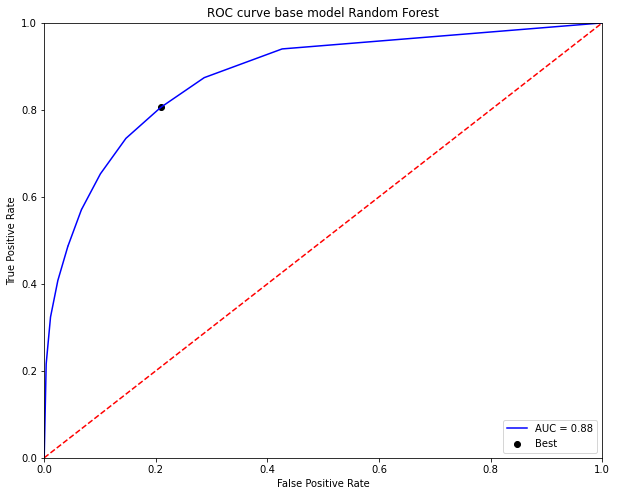

In [82]:
# plot curve
plt.figure(figsize = (10,8))
plt.title('ROC curve base model Random Forest')
plt.plot(fpr_base, tpr_base, 'b', label = 'AUC = %0.2f' % roc_auc_base)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(fpr_base[ix_base], tpr_base[ix_base], marker='o', color='black', label='Best')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curves are appropriate when the observations are balanced between each class.

In [31]:
#PRC curve
precision_base, recall_base, thresholds_prc_base = precision_recall_curve(y_test, y_scores_base)
auc_prc_base = auc(recall_base, precision_base)
print(auc_prc_base)

# convert to f score
fscore_prc_base = (2 * precision_base * recall_base) / (precision_base + recall_base)
# locate the index of the largest f score
ix_prc_base = np.argmax(fscore_prc_base)
print('Best Threshold for base model=%f, F-Score=%.3f' % (thresholds_prc_base[ix_prc_base], 
                                                          fscore_prc_base[ix_prc_base]))

0.7442122813894725
Best Threshold for base model=0.400000, F-Score=0.665


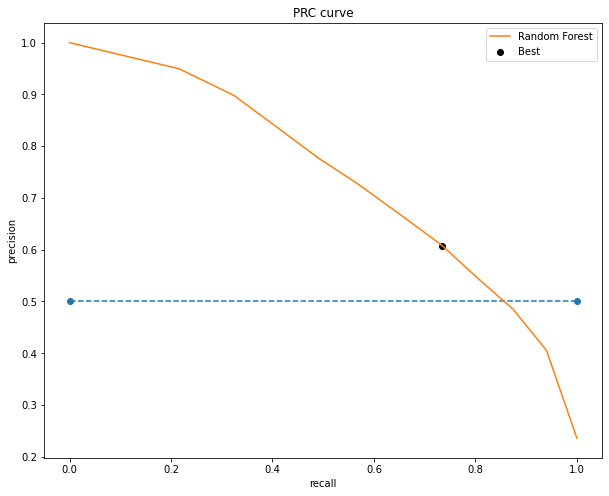

In [99]:
#plot curve
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'o--')
plt.plot(recall_base, precision_base, label = 'Random Forest')
plt.scatter(recall_base[ix_base], precision_base[ix_base], marker='o', color='black', label='Best')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.legend()
plt.show()

Precision-recall curves are appropriate for imbalanced datasets.

### Random search model

In [12]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [13]:
rf_random = RandomizedSearchCV(RandomForestClassifier(), random_grid, n_iter = 60, cv = 2, verbose=1, 
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 28.7min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [15]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [32]:
random_model = RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                             min_samples_leaf=1,max_features='sqrt',
                                             max_depth=20,bootstrap=True)
random_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=1000)

In [33]:
random_accuracy = random_model.score(X_train, y_train)
print("Evaluating the random model on the training set yields an accuracy of {}%".format(random_accuracy*100))
random_accuracy = random_model.score(X_test, y_test)
print("Evaluating the random model on the testing set yields an accuracy of {:.2f}%".format(random_accuracy*100))

Evaluating the random model on the training set yields an accuracy of 94.42277571327662%
Evaluating the random model on the testing set yields an accuracy of 86.25%


In [34]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.76%.


In [35]:
# Make prediction
y_pred_random = random_model.predict(X_test)
print(y_pred_random)

[0 0 0 ... 1 0 1]


In [36]:
kf = KFold(n_splits=10)
cv_scores_random = cross_val_score(random_model, X_train, y_train, cv=kf, 
                                   scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (cv_scores_random.mean(), cv_scores_random.std()))

MSE: -0.14 (+/- 0.00)


In [37]:
confusion_matrix(y_test,y_pred_random)
pd.crosstab(y_test, y_pred_random, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,11732,703,12435
1,1536,2310,3846
All,13268,3013,16281


In [38]:
matthews_corr_random = matthews_corrcoef(y_test,y_pred_random)
print(matthews_corr_random)

0.5951083171945872


In [39]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.77      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281



In [52]:
# ROC curves
y_scores_random = random_model.predict_proba(X_test)[:,1]
fpr_random, tpr_random, thresholds_roc_random = roc_curve(y_test, y_scores_random)
roc_auc_random = auc(fpr_random, tpr_random)
random_auc = roc_auc_score(y_test, y_scores_random)
print(random_auc)

# get the best threshold
gmeans_roc_random = np.sqrt(tpr_random * (1-fpr_random))
ix_roc_random = np.argmax(gmeans_roc_random)
print('Best Threshold for random model=%f, G-Mean=%.3f' % (thresholds_roc_random[ix_roc_random], 
                                                         gmeans_roc_random[ix_roc_random]))

0.9143376760402142
Best Threshold for random model=0.269384, G-Mean=0.828


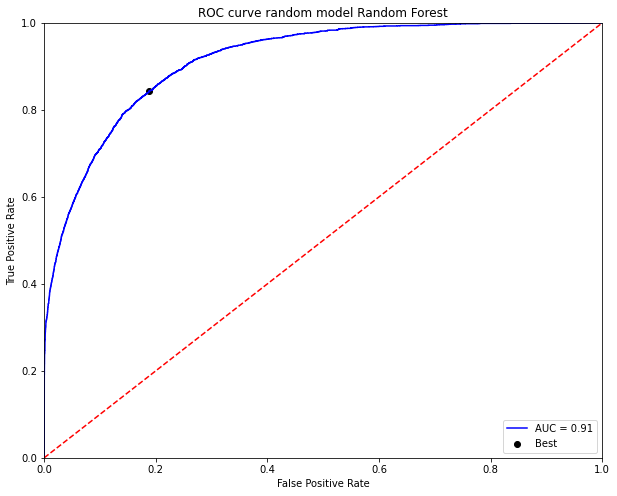

In [54]:
plt.figure(figsize = (10,8))
plt.title('ROC curve random model Random Forest')
plt.plot(fpr_random, tpr_random, 'b', label = 'AUC = %0.2f' % roc_auc_random)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(fpr_random[ix_roc_random], tpr_random[ix_roc_random], marker='o', color='black', label='Best')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
precision_random, recall_random, thresholds_prc_random = precision_recall_curve(y_test, y_scores_random)
auc_prc_random = auc(recall_random, precision_random)
print(auc_prc_random)

# convert to f score
fscore_prc_random = (2 * precision_random * recall_random) / (precision_random + recall_random)
# locate the index of the largest f score
ix_prc_random = np.argmax(fscore_prc_random)
print('Best Threshold for random model=%f, F-Score=%.3f' % (thresholds_prc_random[ix_prc_random], 
                                                          fscore_prc_random[ix_prc_random]))

0.8007215251314836
Best Threshold for random model=0.331167, F-Score=0.704


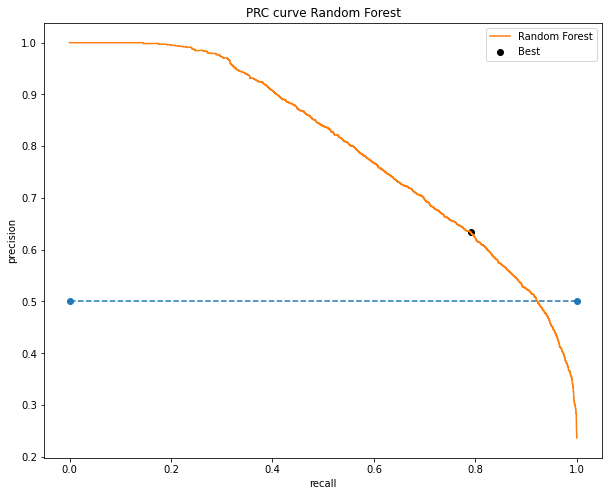

In [56]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'o--')
plt.plot(recall_random, precision_random, label = 'Random Forest')
plt.scatter(recall_random[ix_prc_random], precision_random[ix_prc_random], marker='o', color='black', 
            label='Best')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve Random Forest')
plt.legend()
plt.show()

### Grid search model

In [39]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [700, 800, 900, 2000]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, 
                           n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 84.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 101.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 40, 50, 60],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [700, 800, 900, 2000]},
             verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 700}

In [12]:
grid_model = RandomForestClassifier(n_estimators=700,min_samples_split=6,
                                             min_samples_leaf=3,max_features='sqrt',
                                             max_depth=40,bootstrap=True)
grid_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=6, n_estimators=700)

In [44]:
grid_accuracy = grid_model.score(X_train, y_train)
print("Evaluating the grid model on the training set yields an accuracy of {}%".format(grid_accuracy*100))
grid_accuracy = grid_model.score(X_test, y_test)
print("Evaluating the grid model on the testing set yields an accuracy of {:.2f}%".format(grid_accuracy*100))

Evaluating the grid model on the training set yields an accuracy of 91.60652314118117%
Evaluating the grid model on the testing set yields an accuracy of 86.25%


In [45]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.77%.


In [46]:
# Make prediction
y_pred_grid = grid_model.predict(X_test)
print(y_pred_grid)

[0 0 0 ... 1 0 1]


In [24]:
kf = KFold(n_splits=10)
cv_scores_grid = cross_val_score(grid_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (cv_scores_grid.mean(), cv_scores_grid.std()))

MSE: -0.14 (+/- 0.01)


In [48]:
confusion_matrix(y_test,y_pred_grid)
pd.crosstab(y_test, y_pred_grid, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,11709,726,12435
1,1512,2334,3846
All,13221,3060,16281


In [47]:
matthews_corr_grid = matthews_corrcoef(y_test,y_pred_grid)
print(matthews_corr_grid)

0.5963428316044085


In [36]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281



In [49]:
# ROC curves
y_scores_grid = grid_model.predict_proba(X_test)[:,1]
fpr_grid, tpr_grid, thresholds_roc_grid = roc_curve(y_test, y_scores_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)
grid_auc = roc_auc_score(y_test, y_scores_grid)
print(grid_auc)

# get the best threshold
gmeans_roc_grid = np.sqrt(tpr_grid * (1-fpr_grid))
ix_roc_grid = np.argmax(gmeans_roc_grid)
print('Best Threshold for grid model=%f, G-Mean=%.3f' % (thresholds_roc_grid[ix_roc_grid], 
                                                         gmeans_roc_grid[ix_roc_grid]))

0.9143142573310492
Best Threshold for grid model=0.263028, G-Mean=0.828


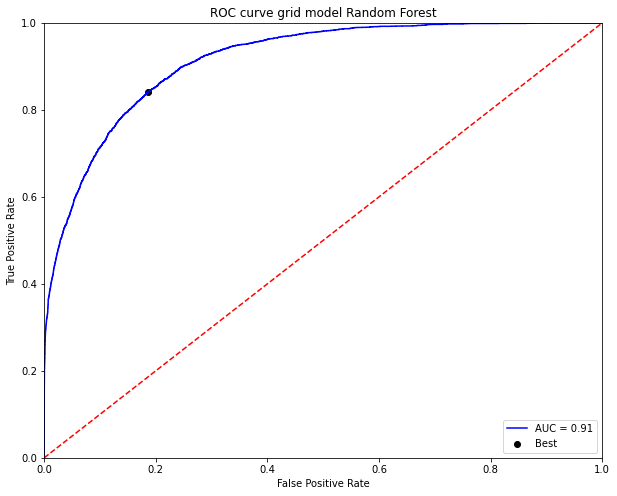

In [58]:
plt.figure(figsize = (10,8))
plt.title('ROC curve grid model Random Forest')
plt.plot(fpr_grid, tpr_grid, 'b', label = 'AUC = %0.2f' % roc_auc_grid)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(fpr_grid[ix_roc_grid], tpr_grid[ix_roc_grid], marker='o', color='black', label='Best')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
precision_grid, recall_grid, thresholds_prc_grid = precision_recall_curve(y_test, y_scores_grid)
auc_prc_grid = auc(recall_grid, precision_grid)
print(auc_prc_grid)

# convert to f score
fscore_prc_grid = (2 * precision_grid * recall_grid) / (precision_grid + recall_grid)
# locate the index of the largest f score
ix_prc_grid = np.argmax(fscore_prc_grid)
print('Best Threshold for random model=%f, F-Score=%.3f' % (thresholds_prc_grid[ix_prc_grid], 
                                                          fscore_prc_grid[ix_prc_grid]))

0.8004875329294372
Best Threshold for random model=0.365903, F-Score=0.705


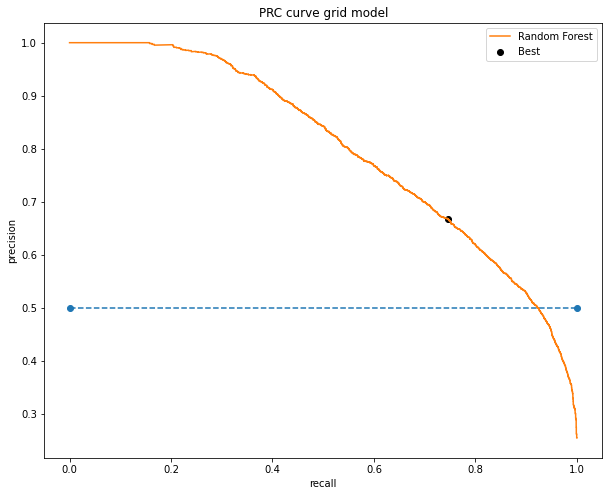

In [60]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'o--')
plt.plot(recall_grid, precision_grid, label = 'Random Forest')
plt.scatter(recall_grid[ix_prc_grid], precision_grid[ix_prc_grid], marker='o', color='black', 
            label='Best')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve grid model')
plt.legend()
plt.show()

### Compare base model vs random search vs grid search

In [68]:
models = pd.DataFrame({
    'Model': ['Base Model', 'Random Search', 'Grid Search'],
    'Accuracy score (%)': [base_accuracy*100, random_accuracy*100, grid_accuracy*100],
    'Matthews corr':[matthews_corr_base, matthews_corr_random, matthews_corr_grid],
    'ROC score (%)':[base_auc*100,random_auc*100,grid_auc*100],
    'ROC treshold':[thresholds_roc_base[ix_roc_base],thresholds_roc_random[ix_roc_random],
                    thresholds_roc_grid[ix_roc_grid]],
    'PRC score (%)':[auc_prc_base*100,auc_prc_random*100,auc_prc_grid*100],
    'PRC treshold':[thresholds_prc_base[ix_prc_base], thresholds_prc_random[ix_prc_random],
                   thresholds_prc_grid[ix_prc_grid]]
})

models.sort_values(by='PRC score (%)', ascending=False)

,Model,Accuracy score (%),Matthews corr,ROC score (%),ROC treshold,PRC score (%),PRC treshold
1,Random Search,86.247773,0.595108,91.433768,0.269384,80.072153,0.331167
2,Grid Search,86.253916,0.596343,91.431426,0.263028,80.048753,0.365903
0,Base Model,84.755236,0.550285,87.730726,0.300000,74.421228,0.400000


### Validation curves

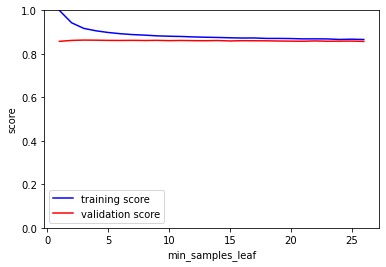

In [7]:
param_range = np.arange(0, 27)
train_score_param1, val_score_param1 = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='min_samples_leaf', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=3, n_jobs=-1)
plt.plot(param_range, np.median(train_score_param1, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score_param1, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()

# if training score is low and validation score is low => model is underfitting
# if trainig score is high and validation score is low => model is overfitting
# when both are high and close to eachother => good model

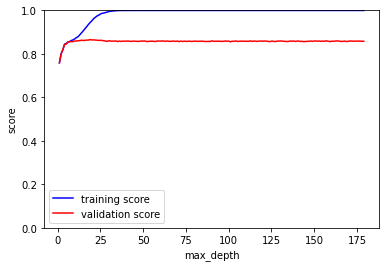

In [9]:
param_range = np.arange(0, 180)
train_score_param2, val_score_param2 = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='max_depth', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=3, n_jobs=-1)
plt.plot(param_range, np.median(train_score_param2, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score_param2, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

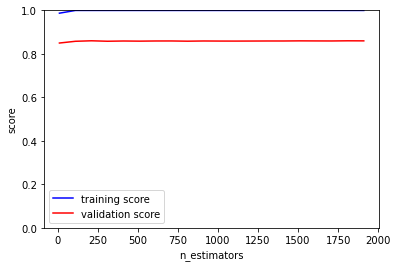

In [14]:
param_range = np.arange(start=10,stop= 2000,step=100)
train_score_param3, val_score_param3 = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='n_estimators', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=3, n_jobs=-1)
plt.plot(param_range, np.median(train_score_param3, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score_param3, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

### Learning curve

In [13]:
train_sizes = [1000, 2500, 5000, 10000, 15000, 20000] # absolute numbers that must be within (0,21707)

train_sizes, train_scores, validation_scores = learning_curve(grid_model, X_train, y_train, 
                                                              train_sizes = train_sizes,
                                                              cv = 3, 
                                                              scoring = 'accuracy')

In [16]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

[0.93666667 0.9312     0.925      0.92253333 0.91928889 0.91823333]
[0.84509081 0.85451931 0.85501071 0.85829689 0.8612452  0.86357926]


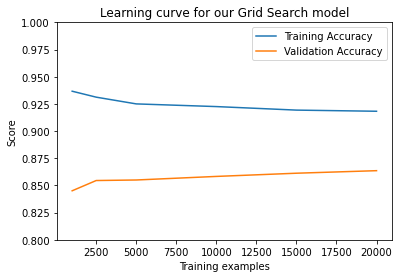

In [20]:
plt.plot(train_sizes, train_scores_mean, label = 'Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation Accuracy')
plt.ylabel('Score')
plt.xlabel('Training examples')
plt.title('Learning curve for our Grid Search model')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show()
# Training and validating scores could converge closer
# This classifier would benefit from adding more training data